<a href="https://colab.research.google.com/github/NamNT36/Artifical-Intelligence/blob/main/AI_W12_FRI_21_04_MTCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 25.0 MB/s eta 0:00:00


In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
from  mtcnn import MTCNN

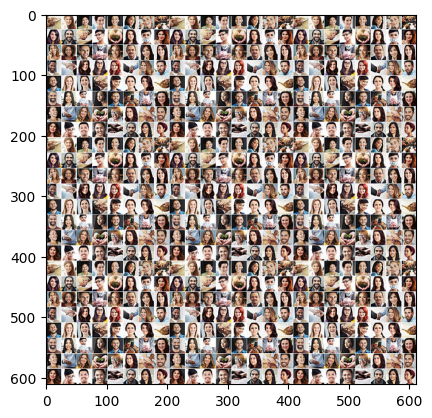

In [ ]:
filename='/content/drive/MyDrive/AI/mtcnn/faces1.jpg'
img = plt.imread(filename)
plt.imshow(img)

In [ ]:
detector = MTCNN()
faces = detector.detect_faces(img)
for face in faces:
  print(face)

23/23 [==============================] - 1s 36ms/step
{'box': [57, 307, 13, 18], 'confidence': 0.9999180436134338, 'keypoints': {'left_eye': (60, 314), 'right_eye': (66, 313), 'nose': (63, 317), 'mouth_left': (60, 320), 'mouth_right': (66, 320)}}
{'box': [184, 539, 12, 16], 'confidence': 0.9999009966850281, 'keypoints': {'left_eye': (187, 544), 'right_eye': (193, 544), 'nose': (189, 548), 'mouth_left': (187, 551), 'mouth_right': (192, 550)}}
{'box': [466, 308, 12, 16], 'confidence': 0.9998981356620789, 'keypoints': {'left_eye': (468, 314), 'right_eye': (475, 313), 'nose': (471, 316), 'mouth_left': (469, 320), 'mouth_right': (475, 319)}}
{'box': [184, 335, 11, 15], 'confidence': 0.9997820854187012, 'keypoints': {'left_eye': (187, 341), 'right_eye': (193, 340), 'nose': (189, 344), 'mouth_left': (187, 347), 'mouth_right': (193, 346)}}
{'box': [134, 53, 12, 16], 'confidence': 0.9996904134750366, 'keypoints': {'left_eye': (137, 59), 'right_eye': (143, 59), 'nose': (140, 62), 'mouth_left': (

In [ ]:
#box: tọa độ điểm gốc (x,y), chiều rộng và chiều cao (đơn vị pixel)
#confidence: độ tự tin (độ chính xác)
#keypoints: cho biết cảm xúc khuôn mặt 

23/23 [==============================] - 1s 53ms/step


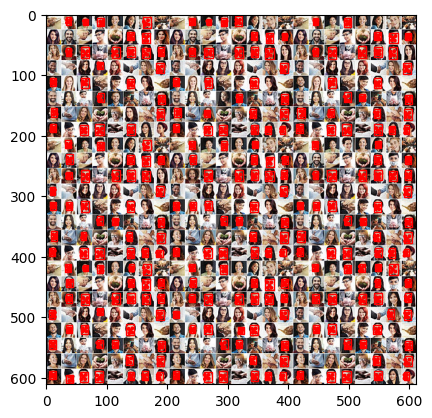

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
from mtcnn import MTCNN

filename = '/content/drive/MyDrive/AI/mtcnn/faces1.jpg'
img = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(img)
plt.imshow(img)
ax = plt.gca()

for face in faces:
  x,y,width,height = face['box']
  rect = plt.Rectangle((x,y), width, height,
                       fill = False, color='red')
  ax.add_patch(rect)

  for key,value in face['keypoints'].items():
    dot = plt.Circle(value,radius = 2, color = 'red')
    ax.add_patch(dot)

  plt.savefig('nfaces.png')
  
plt.show()

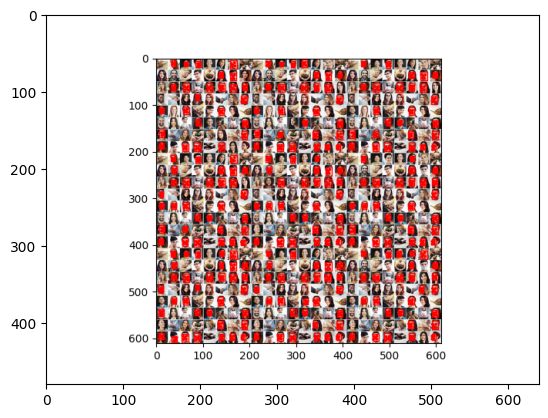

In [ ]:
filename = 'nfaces.png'
img = plt.imread(filename)
plt.imshow(img)

In [ ]:
def draw_faces(filename,result_list):   #result_list: truyền tất cả gương mặt vào
  data = plt.imread(filename)
  for i in range(len(result_list)):
    x1,y1,width,height = result_list[i]['box']
    x2,y2 = x1 + width, y1 + height
    plt.subplot(1,len(result_list),i+1)
    plt.axis('off')
    plt.imshow(data[y1:y2,x1:x2])
    plt.savefig('/content/drive/MyDrive/AI/mtcnn/face{0}.png'.format(i))
  plt.show()
  

filename = '/content/drive/MyDrive/AI/mtcnn/faces1.jpg'
img = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(img)
draw_faces(filename,faces)

23/23 [==============================] - 1s 36ms/step


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'bird.jpg' #địa chỉ ảnh động vật
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 2s 2s/step
Predicted: [('n01833805', 'hummingbird', 0.99990296), ('n01843065', 'jacamar', 8.663133e-05), ('n01806143', 'peacock', 8.904144e-06)]


In [ ]:
#Nhận diện loài động vật(với độ chính xác của mỗi loài)

In [ ]:
#Nhận diện đồ vật
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

model = VGG16(weights='imagenet', include_top=True)

img_path = 'eraser.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

print('Predicted:', decode_predictions(features, top=3)[0])

1/1 [==============================] - 0s 139ms/step
Predicted: [('n04116512', 'rubber_eraser', 0.45360172), ('n03492542', 'hard_disc', 0.07364076), ('n02786058', 'Band_Aid', 0.07359478)]


In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from keras.applications.mobilenet_v2 import MobileNetV2
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)
model = MobileNetV2((224, 224, 3), 1000)

img_path = 'horse.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)

print('Predicted:', decode_predictions(block4_pool_features, top=3)[0])

ValueError: ignored

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(200, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
model.fit(...)

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
model.fit(...)

ValueError: ignored